<a href="https://colab.research.google.com/github/kundajelab/locusselect/blob/master/examples/regression%20on%20200%20bp%20genome%20bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)

In [8]:
#!pip install locusselect 

## Regression K562 DNAse model (trained genomewide), fully connected layer embeddings 

In [9]:
## generate embeddings at the -2 layer 
import locusselect 
from locusselect.embeddings import * 
from locusselect.interpret import * 
from locusselect.utils import * 
from locusselect.gapped_kmers import * 
import numpy as np


In [10]:
coord_prefix="/mnt/lab_data2/annashch/locusselect_examples/coordinates/Gurkan_hg19_loci_coords"
locus="BCL11A" #chr2, split1
split=1

#locus="HBA2"
#split=4

#locus="HBE1"
#split=7

#locus="LMO2"
#split=7

#locus="MYC"
#split=9

#locus="RBM38"
#split=2

coords=coord_prefix+"/"+locus+".geneLocus.250bp.windows.hg19.bed"

In [102]:
#first, we get embeddings from the model fully connected layer 
fc_embedding_args={"input_bed_file":coords,
                   "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/regression/DNASE.K562.regressionlabels.allbins."+str(split),
                   "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                   "center_on_summit":False,
                   "center_on_bed_interval":True,
                   "flank":500,
                   "embedding_layer":-2,
                   "expand_dims":True,
                   "threads":20,
                   "output_npz_file":locus+"_FC_layer_NN_embeddings.npz"}

fc_regions, fc_embeddings = compute_embeddings(fc_embedding_args)
## alternatively, get the pre-generated embeddings 
#fc_regions,fc_embeddings,data_type=load_embedding("k562_dnase_regression_embeddings.0.-2.npz")

got model architecture
loaded model weights
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 1000, 300)      23100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 1, 1000, 300)      1200      
_________________________________________________________________
activation_11 (Activation)   (None, 1, 1000, 300)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 333, 300)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 333, 200)       660200    
_________________________________________________________________
batch_normalization_12 (Batc (None, 1, 333, 200)       800       
_________________________________________________________________
activation_12 (Activation)   (No

In [103]:
fc_regions[0]

('chr20', 54966250, 54966500)

## First conv layer embeddings 

In [104]:
#first, we get embeddings from the model fully connected layer 
conv1_embedding_args={"input_bed_file":coords,
                   "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/regression/DNASE.K562.regressionlabels.allbins."+str(split),
                   "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                   "center_on_summit":False,
                   "center_on_bed_interval":True,
                   "flank":250,
                   "embedding_layer":1,
                   "expand_dims":True,
                   "threads":20,
                   "global_pool_on_position":True,
                   "num_rows":1000,
                   "output_npz_file":locus+"_CONV1_layer_NN_embeddings.npz"}

conv1_regions, conv1_embeddings = compute_embeddings(conv1_embedding_args)

got model architecture
loaded model weights
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 1000, 300)      23100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 1, 1000, 300)      1200      
_________________________________________________________________
activation_11 (Activation)   (None, 1, 1000, 300)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 333, 300)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 333, 200)       660200    
_________________________________________________________________
batch_normalization_12 (Batc (None, 1, 333, 200)       800       
_________________________________________________________________
activation_12 (Activation)   (No

## GKM explain K-mer embeddings 

In [105]:
kmer_len=6
num_gaps=1
alphabet_size=4
gkmexplanations="/mnt/lab_data2/annashch/locusselect_examples/dataForGurkan/gkm_explain/gkm_explain_"+locus+".txt"
imp_score_files=[gkmexplanations]
compute_gapped_kmer_embedding(kmer_len,
                              num_gaps,
                              alphabet_size,
                              imp_score_files,
                              outf=[locus+".gapped.kmer.embeddings.kmer_len=6.num_gaps=1.alphabet_size=4.npz"],
                              batch_size=100)

kmer_embeddings=compute_gapped_kmer_embedding(kmer_len,
                                         num_gaps,
                                         alphabet_size,
                                         imp_score_files,
                                         outf=None,
                                         batch_size=100)

generated gapped kmers
got gapped kmer embedding function
Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Done 3000
Done 3100
Done 3200
Done 3300
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Done 8000
Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1

## Compute deepLIFT scores

In [106]:
#next, we get deepLIFT scores with 10 shuffled references  
deeplift_args={ "input_bed_file":coords,
                "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/regression/DNASE.K562.regressionlabels.allbins."+str(split),
                "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                "center_on_summit":False,
                "center_on_bed_interval":True,
                "flank":500,
                "expand_dims":True,
                "threads":20,
                "task_index":0,
                "batch_size":500,
                "deeplift_num_refs_per_seq":10, #PLEASE SET THIS TO AT LEAST 10 IN PRACTISE!!!
                "deeplift_reference":"shuffled_ref",
                "deeplift_layer":-1,
                "output_npz_file":locus+".deepLIFT.shuffled.ref.10.npz"}
deeplift_regions, deeplift_embeddings=compute_deeplift_scores(deeplift_args)


created data generator
17
0
done with batch
1
done with batch
2
done with batch
3
done with batch
4
done with batch
5
done with batch
6
done with batch
7
done with batch
8
done with batch
9
done with batch
10
done with batch
11
done with batch
12
done with batch
13
done with batch
14
done with batch
15
done with batch
16
done with batch
17
writing output file


In [6]:
#next, we get deepLIFT scores with 0 reference 
gradxinput_args={ "input_bed_file":coords,
                "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/regression/DNASE.K562.regressionlabels.allbins."+str(split),
                "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                "center_on_summit":False,
                "center_on_bed_interval":True,
                "flank":500,
                "expand_dims":True,
                "threads":20,
                "task_index":0,
                "batch_size":500,
                "input_grad":True,
                "interpretation_layer":-1,
                "output_npz_file":locus+".input_grad.npz"}
grad_regions, grad_embeddings=compute_interpretation_scores(gradxinput_args)

created data generator
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
writing output file


In [108]:
print(fc_regions.shape)
print(deeplift_regions.shape) 
print(fc_embeddings.shape)
print(deeplift_embeddings.shape)

(8001,)
(8001,)
(8001, 1000)
(8001, 1, 1000, 4)


## Compute gradxinput

In [11]:
#next, we get deepLIFT scores with 0 reference 
gradxinput_args={"input_bed_file":coords,
                "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/classification/DNASE.K562.classification.SummitWithin200bpCenter."+str(split),
                "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                "center_on_summit":False,
                "center_on_bed_interval":True,
                "flank":500,
                "expand_dims":True,
                "threads":20,
                "task_index":0,
                "batch_size":500,
                "interpretation_layer":-2,
                "input_grad":True,
                "output_npz_file":locus+".input_grad.npz"}
grad_regions, grad_embeddings=compute_interpretation_scores(gradxinput_args)

created data generator
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
writing output file


In [24]:
deeplift_regions

array([('chr2', 59780500, 59780750), ('chr2', 59780750, 59781000),
       ('chr2', 59781000, 59781250), ..., ('chr2', 61780000, 61780250),
       ('chr2', 61780250, 61780500), ('chr2', 61780500, 61780750)],
      dtype=object)

In [34]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
deeplift_regions.shape

(8001,)

In [57]:
deeplift_embeddings.shape

(8001, 1000, 4)

In [61]:
kmer_embeddings[0].shape

(8001, 5120)

## UMAP clustering on fc layer embeddings 

In [35]:
fc_embeddings.shape

(8001, 1000)

In [36]:
#we will randomly select 5000 peaks for clustering/visualizing (more than that takes a long time)
n=5000 
indices_for_clustering=np.random.choice(fc_embeddings.shape[0],n) 

In [37]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(fc_embeddings[indices_for_clustering])


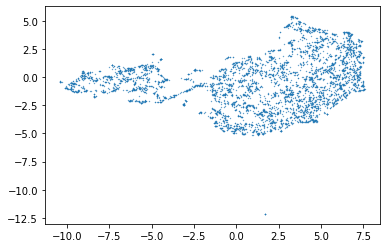

In [38]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.1, cmap='Spectral');


In [39]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(fc_embeddings[indices_for_clustering])

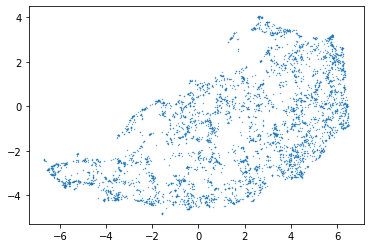

In [40]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');

In [41]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
    
).fit_predict(clusterable_embedding)

W1002 15:19:22.706990 139733996500736 _axes.py:4271] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


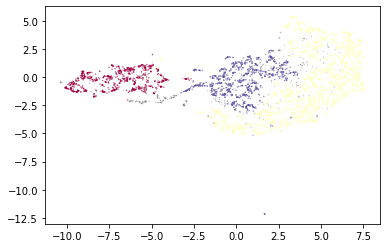

In [42]:
#-1 means the regions were not clustered 
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [43]:
clustered_regions=fc_regions[indices_for_clustering]
df=pd.DataFrame({'chrom':[i[0] for i in clustered_regions],
                'start':[i[1] for i in clustered_regions],
                'end':[i[2]for i in clustered_regions],
                'labels':labels})
#write to output bed file for analysis of motif enrichment in clusters 
df.to_csv("regression_fc_layer_embeddings_clusters.bed")

## UMAP clustering on deepLIFT scores

In [44]:
#We condense the deepLIFT scores to 2-D 
deeplift_embeddings=np.squeeze(deeplift_embeddings)
#take the sum over the absolute value of the channel axis 
deeplift_embeddings_collapsed=np.sum(deeplift_embeddings,axis=-1)
deeplift_embeddings_collapsed.shape

(8001, 1000)

In [45]:
#we will randomly select 50000 peaks for clustering/visualizing (more than that takes a long time)
n=5000 
indices_for_clustering=np.random.choice(deeplift_embeddings_collapsed.shape[0],n) 

In [46]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(deeplift_embeddings_collapsed[indices_for_clustering])


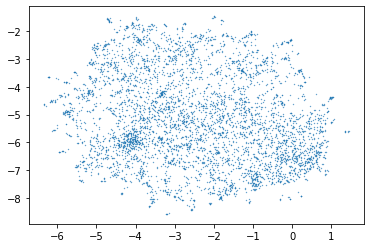

In [47]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.1, cmap='Spectral');


In [48]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(deeplift_embeddings_collapsed[indices_for_clustering])

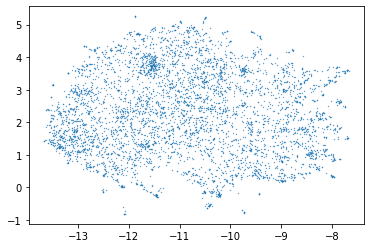

In [49]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');

In [50]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

W1002 15:26:36.580840 139733996500736 _axes.py:4271] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


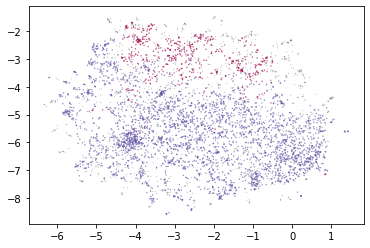

In [51]:
#-1 means the 
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [52]:
deeplift_regions.shape

(8001,)

In [53]:
clustered_regions=deeplift_regions[indices_for_clustering]
df=pd.DataFrame({'chrom':[i[0] for i in clustered_regions],
                'start':[i[1] for i in clustered_regions],
                'end':[i[2]for i in clustered_regions],
                'labels':labels})
#write to output bed file for analysis of motif enrichment in clusters 
df.to_csv("regression_deeplift_embeddings_clusters.bed")